In [926]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
le = LabelEncoder()
df = pd.read_csv('breast-cancer.csv')

In [927]:
df.rename(columns={'class': 'recurrence_events'}, inplace = True)
df.rename(columns={'tumor-size': 'tumor_size'}, inplace = True)
df.rename(columns={'inv-nodes': 'inv_nodes'}, inplace = True)
df.rename(columns={'node-caps': 'node_caps'}, inplace = True)
df.rename(columns={'deg-malig': 'deg_malig'}, inplace = True)
df.rename(columns={'breast-quead': 'breast_quead'}, inplace = True)


In [928]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   recurrence_events  286 non-null    object
 1   age                286 non-null    object
 2   menopause          286 non-null    object
 3   tumor_size         286 non-null    object
 4   inv_nodes          286 non-null    object
 5   node_caps          286 non-null    object
 6   deg_malig          286 non-null    int64 
 7   breast             286 non-null    object
 8   breast_quead       286 non-null    object
 9   irradiat           286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [929]:
print(df['recurrence_events'].unique())  
print(df["age"].unique()) 
print(df['menopause'].unique())  
print(df["tumor_size"].unique())  
print(df["inv_nodes"].unique())  
print(df['node_caps'].unique())  
#print(df["deg_malig"].unique())  
print(df['breast'].unique()) 
print(df['breast_quead'].unique()) 
print(df["irradiat"].unique())

['no-recurrence-events' 'recurrence-events']
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
['premeno' 'ge40' 'lt40']
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
['no' 'yes' '?']
['left' 'right']
['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
['no' 'yes']


In [931]:
print(df['recurrence_events'].unique())  
print(df["age"].unique()) 
print(df['menopause'].unique())  
#print(df["tumor_size"].unique())  
print(df["inv_nodes"].unique())  
print(df['node_caps'].unique())  
print(df['breast'].unique()) 
print(df['breast_quead'].unique()) 
print(df["irradiat"].unique())

['no-recurrence-events' 'recurrence-events']
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
['premeno' 'ge40' 'lt40']
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
['no' 'yes' '?']
['left' 'right']
['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
['no' 'yes']


In [932]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   recurrence_events  286 non-null    object
 1   age                286 non-null    object
 2   menopause          286 non-null    object
 3   inv_nodes          286 non-null    object
 4   node_caps          286 non-null    object
 5   breast             286 non-null    object
 6   breast_quead       286 non-null    object
 7   irradiat           286 non-null    object
dtypes: object(8)
memory usage: 18.0+ KB


In [933]:
df['recurrence_events'] = le.fit_transform(df['recurrence_events'])
df["age"] = df["age"].replace({"20-29": 0, "30-39": 1, "40-49": 2, "50-59": 3, "60-69": 4, "70-79": 5})
df['menopause'] = le.fit_transform(df['menopause'])
#df["tumor_size"] = df["tumor_size"].replace({"0-4": 0, "5-9": 1, "10-14": 2, "15-19": 3, "20-24": 4, "25-29": 5, "30-34": 6, "35-39": 7, "40-44": 8, "45-49": 9, "50-54": 10})
df["inv_nodes"] = df["inv_nodes"].replace({"0-2": 0, "3-5": 1, "6-8": 2, "9-11": 3, "12-14": 4, "15-17": 5, "24-26": 6})
df['node_caps'] = le.fit_transform(df['node_caps'])
#df["deg_malig"] = df["deg_malig"].replace({1: 0, 2: 1, 3: 2})
df['breast'] = le.fit_transform(df['breast'])
df['breast_quead'] = le.fit_transform(df['breast_quead'])
df["irradiat"] = df["irradiat"].replace({"no": 0, "yes": 1})

In [934]:
# Imputar los valores faltantes ('?') en la columna "breast_quead" con la moda
mode = df['breast_quead'].mode()[0]
df['breast_quead'] = df['breast_quead'].replace('?', mode)

In [935]:
# Imputar los valores faltantes ('?') en la columna "breast_quead" con la moda
mode = df['node_caps'].mode()[0]
df['node_caps'] = df['node_caps'].replace('?', mode)

In [936]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   recurrence_events  286 non-null    int32
 1   age                286 non-null    int64
 2   menopause          286 non-null    int32
 3   inv_nodes          286 non-null    int64
 4   node_caps          286 non-null    int32
 5   breast             286 non-null    int32
 6   breast_quead       286 non-null    int32
 7   irradiat           286 non-null    int64
dtypes: int32(5), int64(3)
memory usage: 12.4 KB


In [937]:
print(df['recurrence_events'].unique())  
print(df["age"].unique()) 
print(df['menopause'].unique())  
#print(df["tumor_size"].unique())  
print(df["inv_nodes"].unique())  
print(df['node_caps'].unique())  
print(df['breast'].unique()) 
print(df['breast_quead'].unique()) 
print(df["irradiat"].unique())

[0 1]
[1 2 4 3 5 0]
[2 0 1]
[0 2 3 1 5 4 6]
[1 2 0]
[0 1]
[2 5 3 4 1 0]
[0 1]


In [938]:
#print(df["deg_malig"].unique())
#print(df["deg_malig"] == 1.0)


edad, menopause, inv_nodes, node_caps

In [ ]:
df.drop(['deg_malig'], axis = 1, inplace= True)
df.drop(['tumor_size'], axis = 1, inplace= True)
df.drop(['irradiat'], axis = 1, inplace= True)
df.drop([''], axis = 1, inplace= True)

In [939]:
# Codificar las variables categóricas

df_encoded = df.copy()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = le.fit_transform(df_encoded[column])

In [940]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df_encoded.drop("recurrence_events", axis=1)
y = df_encoded["recurrence_events"]

In [941]:
corr = df.corr()

In [942]:
import seaborn as sns

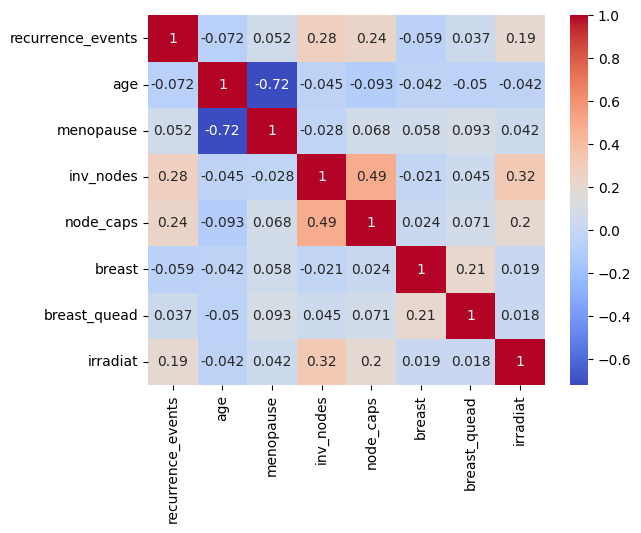

In [943]:
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.show()

edad, menopause, inv_nodes, node_caps

In [944]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [945]:
# Crear una instancia del clasificador k-NN
knn = KNeighborsClassifier(n_neighbors=10)  # Puedes ajustar el valor de k según tus necesidades

In [946]:
# Entrenar el clasificador k-NN
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [947]:
# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)


In [948]:
# Evaluar el rendimiento del clasificador
accuracy = knn.score(X_test, y_test)
print("Exactitud (Accuracy):", accuracy)

Exactitud (Accuracy): 0.6608695652173913
